In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym
from scipy import integrate 

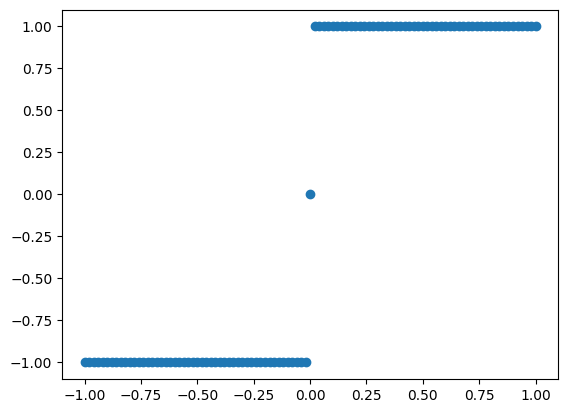

In [ ]:
def fun2(x):
  if x>0:
    return 1
  elif x<0:
    return -1
  else: 
    return 0

xx=np.linspace(-1,1,101)
xx2=np.zeros_like(xx)
for i in range(len(xx)):
  xx2[i]=fun2(xx[i])
plt.scatter(xx,xx2)

In [ ]:

x = sym.Symbol('x')
n = sym.Symbol('n', integer=True)
N=20

def Gauss_Legendre(n):
    func = (x**2 -1)**n
    dfunc = sym.diff(func, x, n)
    return (1/(2**n * sym.factorial(n)))*dfunc
Legendre= []

for i in range(N+1):
    
    Poly = Gauss_Legendre(i)
    Legendre.append(Poly)


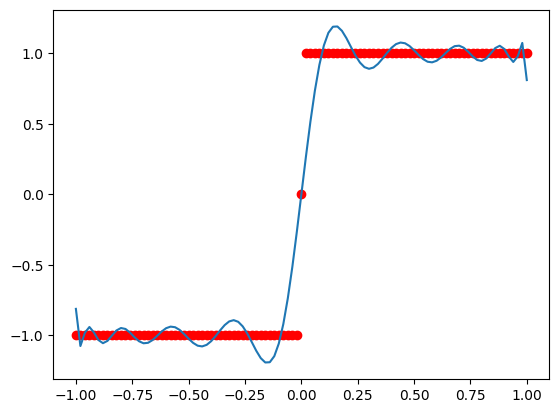

In [ ]:
Roots, Weights = np.polynomial.legendre.leggauss(50)

def gauss_legendre_integrate(fl,X,W):
  xx2=np.zeros_like(X)
  for i in range(len(X)):
    xx2[i]=fun2(X[i])
  return np.sum(W*xx2*fl(X))

I=np.zeros(N+1)

for i in range(N+1):
  fl=sym.lambdify([x],Legendre[i],'numpy')
  I[i]=gauss_legendre_integrate(fl,Roots,Weights)
cnT1=np.zeros(N+1)

for i in range(N+1):
  fff=sym.lambdify([x],Legendre[i],'numpy')
  cnT1[i]=(((2*i)+1)/2)*I[i]

Faprox2=0

for i in range(N+1):
  Faprox2+=Legendre[i]*cnT1[i]
final2=sym.lambdify([x],Faprox2,'numpy')

plt.plot(xx,final2(xx))
plt.scatter(xx,xx2,color="r")
